In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import folium
from folium.plugins import FastMarkerCluster

In [3]:
df = pd.read_excel('House_price_data.xlsx') 

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.style.use('seaborn-darkgrid')
sns.set_palette(palette='dark')
plt.rcParams['figure.figsize'] = (12,8)

In [6]:
df.columns

Index(['Sold_date', 'price', 'room_bed', 'room_bath', 'ceil', 'coast', 'sight',
       'condition', 'quality', 'ceil_measure', 'basement', 'yr_built',
       'yr_renovated', 'zipcode', 'living_measure15', 'lot_measure15',
       'furnished', 'total_area', 'location'],
      dtype='object')

In [7]:
df.dtypes

Sold_date           datetime64[ns]
price                        int64
room_bed                     int64
room_bath                    int64
ceil                         int64
coast                        int64
sight                        int64
condition                    int64
quality                      int64
ceil_measure                 int64
basement                     int64
yr_built                     int64
yr_renovated                 int64
zipcode                      int64
living_measure15             int64
lot_measure15                int64
furnished                    int64
total_area                   int64
location                    object
dtype: object

In [8]:
import calendar

# Create a new dataset with month, year, and price
monthly_data = df[['Sold_date', 'price']].copy()

# Extract month and year from Sold_date
monthly_data['Sold_month'] = df['Sold_date'].dt.month.map(lambda x: calendar.month_name[x])
monthly_data['Sold_year'] = df['Sold_date'].dt.year

# Print the updated dataset
print(monthly_data)


       Sold_date    price Sold_month  Sold_year
0     2015-04-27   600000      April       2015
1     2015-03-17   190000      March       2015
2     2014-08-20   735000     August       2014
3     2014-10-10   257000    October       2014
4     2015-02-18   450000   February       2015
...          ...      ...        ...        ...
20962 2015-03-10   685530      March       2015
20963 2014-05-21   535000        May       2014
20964 2014-09-05   998000  September       2014
20965 2015-02-06   262000   February       2015
20966 2014-12-29  1150000   December       2014

[20967 rows x 4 columns]


In [9]:
monthly_data.drop('Sold_date',axis=1,inplace=True)

In [10]:
monthly_data_2015 = monthly_data[monthly_data['Sold_year']==2015].groupby('Sold_month')['price'].mean().sort_values(ascending=True)

In [11]:
monthly_data_2014 = monthly_data[monthly_data['Sold_year']==2014].groupby('Sold_month')['price'].mean().sort_values(ascending=True)

Text(0, 0.5, 'PRICE')

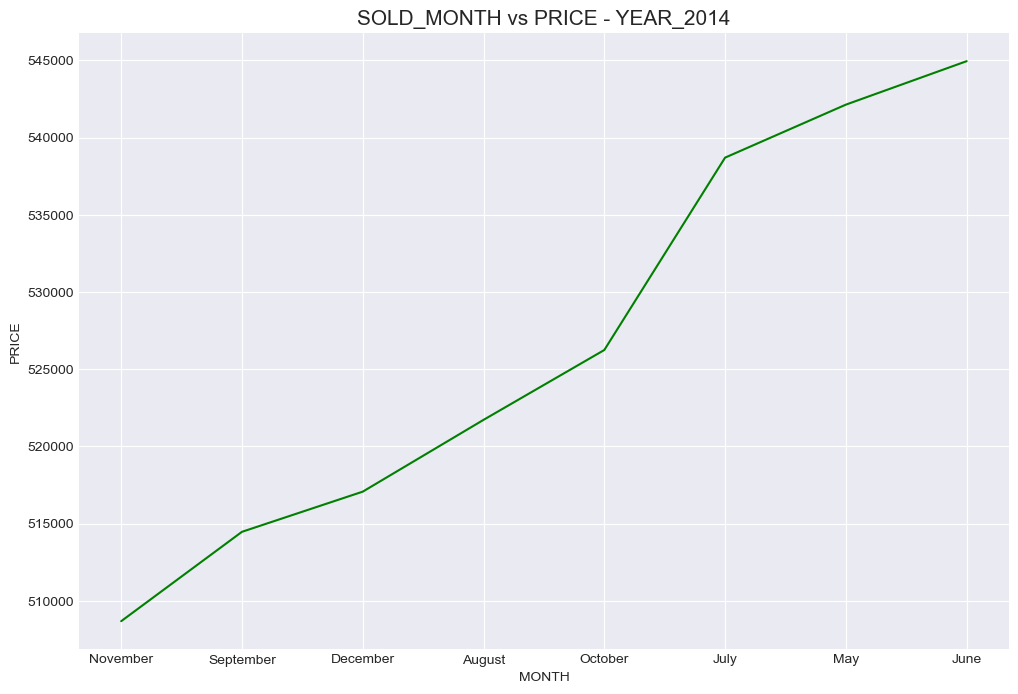

In [12]:
monthly_data_2014.plot(kind='line',color='green')
plt.title('SOLD_MONTH vs PRICE - YEAR_2014')
plt.xlabel('MONTH')
plt.ylabel('PRICE')

### 1. Average House price selling price is highest in the month of June
### 2. Average House price selling price is lowest in the month of November
### 3. Plots are arranged in the order of increase in price with respect to month

Text(0, 0.5, 'PRICE')

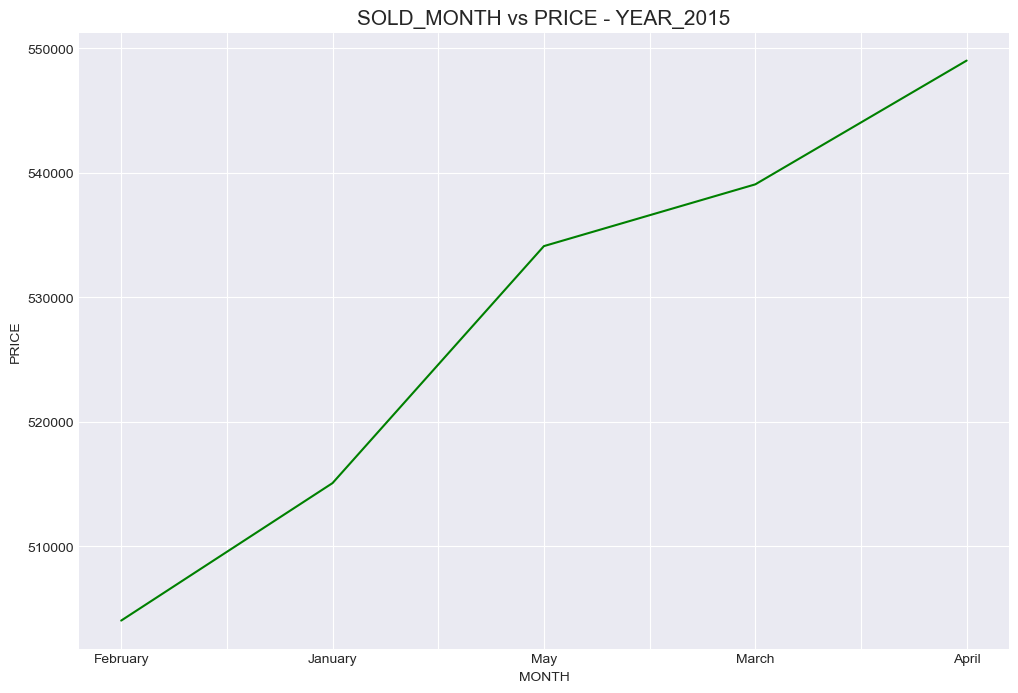

In [13]:
monthly_data_2015.plot(kind='line',color='green')
plt.title('SOLD_MONTH vs PRICE - YEAR_2015')
plt.xlabel('MONTH')
plt.ylabel('PRICE')

### 1. Average House price selling price is highest in the month of April
### 2. Average House price selling price is lowest in the month of Feb
### 3. Plots are arranged in the order of increase in price with respect to month

In [14]:
df['coast'] = df['coast'].astype('object')
df['condition'] = df['condition'].astype('object')
df['quality'] = df['quality'].astype('object')
df['furnished'] = df['furnished'].astype('object')
df['sight'] = df['sight'].astype('object')

In [15]:
df['House_age'] = int(0)

In [16]:
df['yr_built'] = pd.to_datetime(df['yr_built'], format='%Y')
df['Sold_date'] = pd.to_datetime(df['Sold_date'])

df['House_age'] = df['Sold_date'].dt.year - df['yr_built'].dt.year

In [17]:
df['is_renovated'] =int(0)
for index,row in df.iterrows():
    if row['yr_renovated']!=int(0):
        df.at[index,'is_renovated']=int(1)

In [18]:
df.head()

,Sold_date,price,room_bed,room_bath,ceil,coast,sight,condition,quality,ceil_measure,...,yr_built,yr_renovated,zipcode,living_measure15,lot_measure15,furnished,total_area,location,House_age,is_renovated
0,2015-04-27,600000,4,2,1,0,0,3,8,1800,...,1966-01-01,0,98034,2020,8660,0,12490,Kirkland,49,0
1,2015-03-17,190000,2,1,1,0,0,4,6,670,...,1948-01-01,0,98118,1660,4100,0,3771,Seattle,67,0
2,2014-08-20,735000,4,3,2,1,4,3,8,3040,...,1966-01-01,0,98118,2620,2433,0,5455,Seattle,48,0
3,2014-10-10,257000,3,3,2,0,0,3,8,1740,...,2009-01-01,0,98002,2030,3794,0,5461,Auburn,5,0
4,2015-02-18,450000,2,1,1,0,0,3,7,1120,...,1924-01-01,0,98118,1120,5100,0,5710,Seattle,91,0


##### We will remove sold_date ,year built , year renovated and zipcode 

In [19]:
df.drop(['Sold_date','yr_built','yr_renovated','zipcode'],axis=1,inplace=True)

In [20]:
df.to_excel('House_price_data_new.xlsx', index=False)

In [21]:
df.columns

Index(['price', 'room_bed', 'room_bath', 'ceil', 'coast', 'sight', 'condition',
       'quality', 'ceil_measure', 'basement', 'living_measure15',
       'lot_measure15', 'furnished', 'total_area', 'location', 'House_age',
       'is_renovated'],
      dtype='object')

In [22]:
df['location'].unique()

array(['Kirkland', 'Seattle', 'Auburn', 'Bellevue', 'Covington', 'Kent',
       'Snoqualmie', 'Renton', 'Redmond Ridge', 'Maple Valley',
       'Federal Way', 'Sammamish', 'Bothell', 'Carnation', 'Des Moines',
       'Redmond', 'Woodinville', 'Tanner', 'Burien', 'Shoreline',
       'Issaquah', 'Mercer Island', 'Kenmore', 'Duvall', 'Black Diamond',
       'SeaTac', 'Medina', 'Vashon', 'Enumclaw'], dtype=object)

In [23]:
df['is_renovated'] = df['is_renovated'].astype('object')

In [24]:
df.dtypes

price                int64
room_bed             int64
room_bath            int64
ceil                 int64
coast               object
sight               object
condition           object
quality             object
ceil_measure         int64
basement             int64
living_measure15     int64
lot_measure15        int64
furnished           object
total_area           int64
location            object
House_age            int64
is_renovated        object
dtype: object

In [25]:
df.shape

(20967, 17)

## UNIVARIATE ANALYSIS

In [26]:
num = df.select_dtypes('int64')

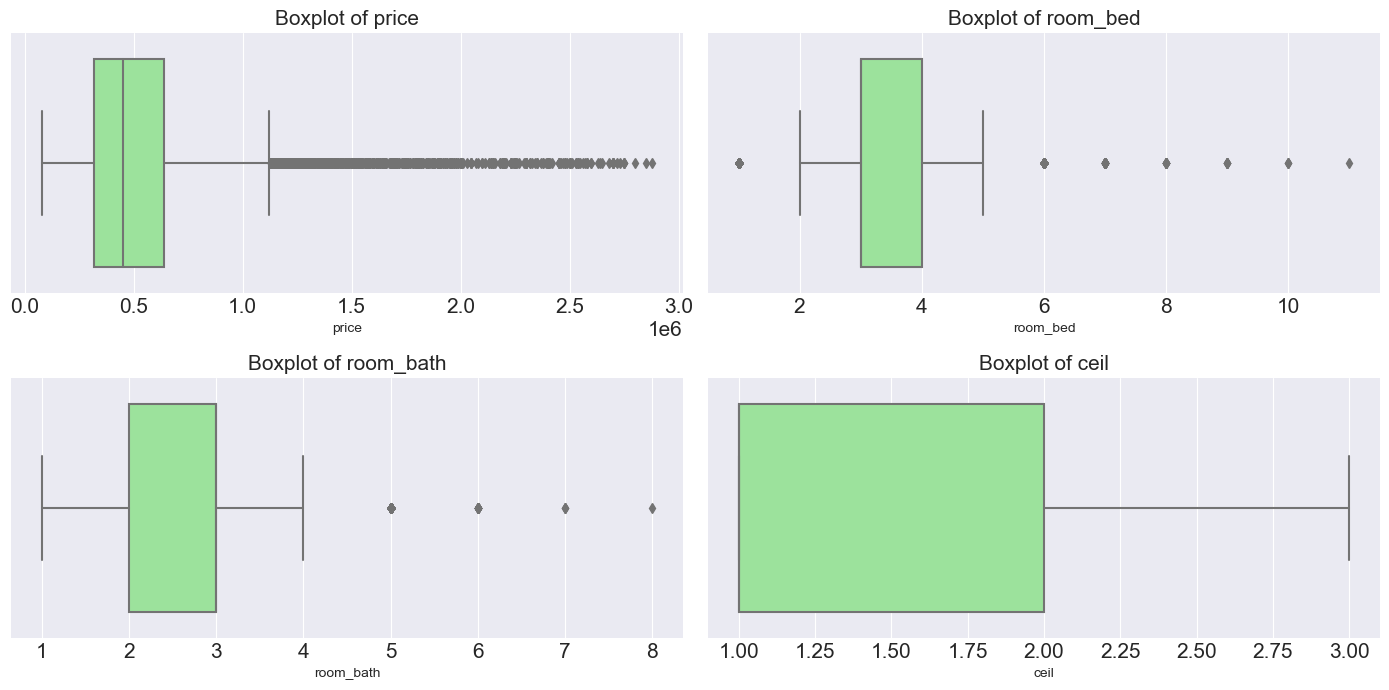

In [27]:
plt.figure(figsize = (14,7))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
feature_list_1 = ['price', 'room_bed', 'room_bath', 'ceil']
for i in range(len(feature_list_1)):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[feature_list_1[i]], data=df,color='lightgreen')
    plt.title('Boxplot of {}'.format(feature_list_1[i]))
    plt.tight_layout()
plt.show()

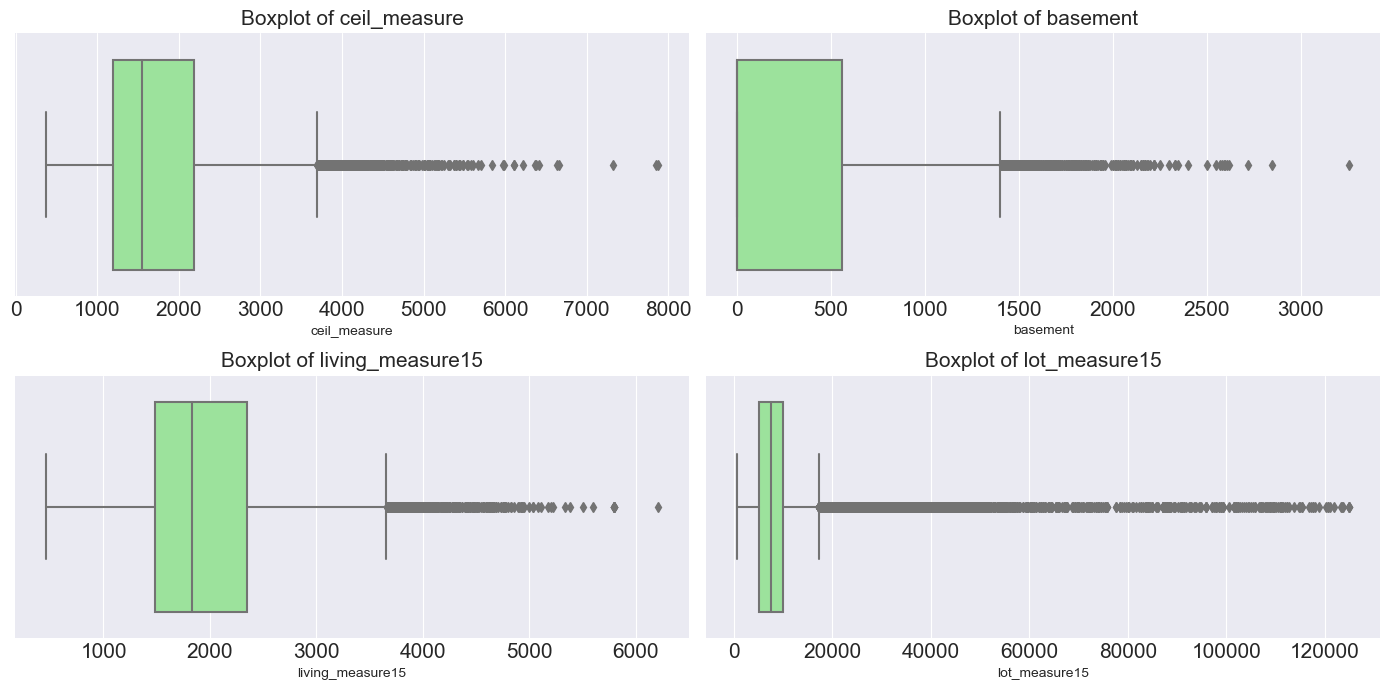

In [28]:
plt.figure(figsize = (14,7))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
feature_list_2 = ['ceil_measure', 'basement', 'living_measure15', 'lot_measure15']
for i in range(len(feature_list_2)):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[feature_list_2[i]], data=df,color='lightgreen')
    plt.title('Boxplot of {}'.format(feature_list_2[i]))
    plt.tight_layout()
plt.show()

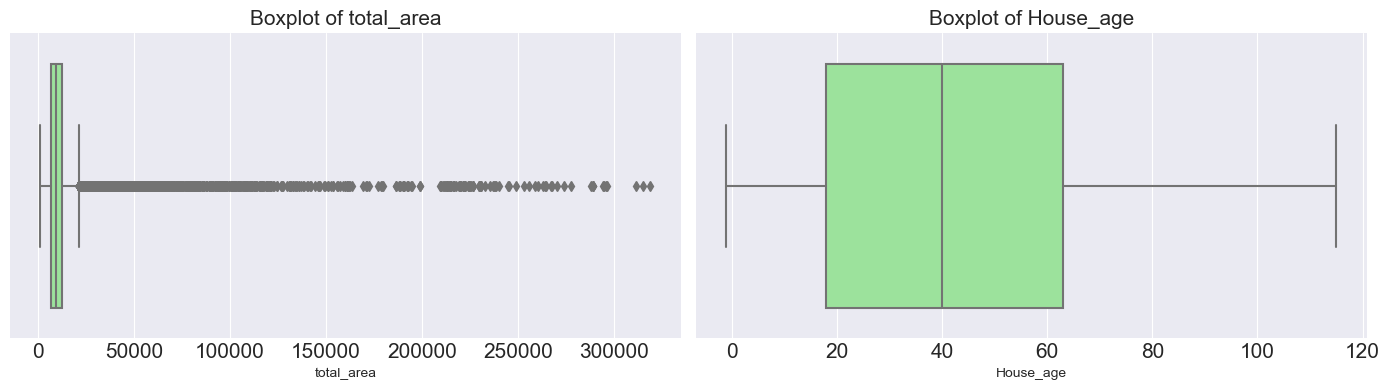

In [29]:
plt.figure(figsize = (14,4))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
feature_list_3 = ['total_area','House_age']
for i in range(len(feature_list_3)):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x=df[feature_list_3[i]], data=df,color='lightgreen')
    plt.title('Boxplot of {}'.format(feature_list_3[i]))
    plt.tight_layout()
plt.show()

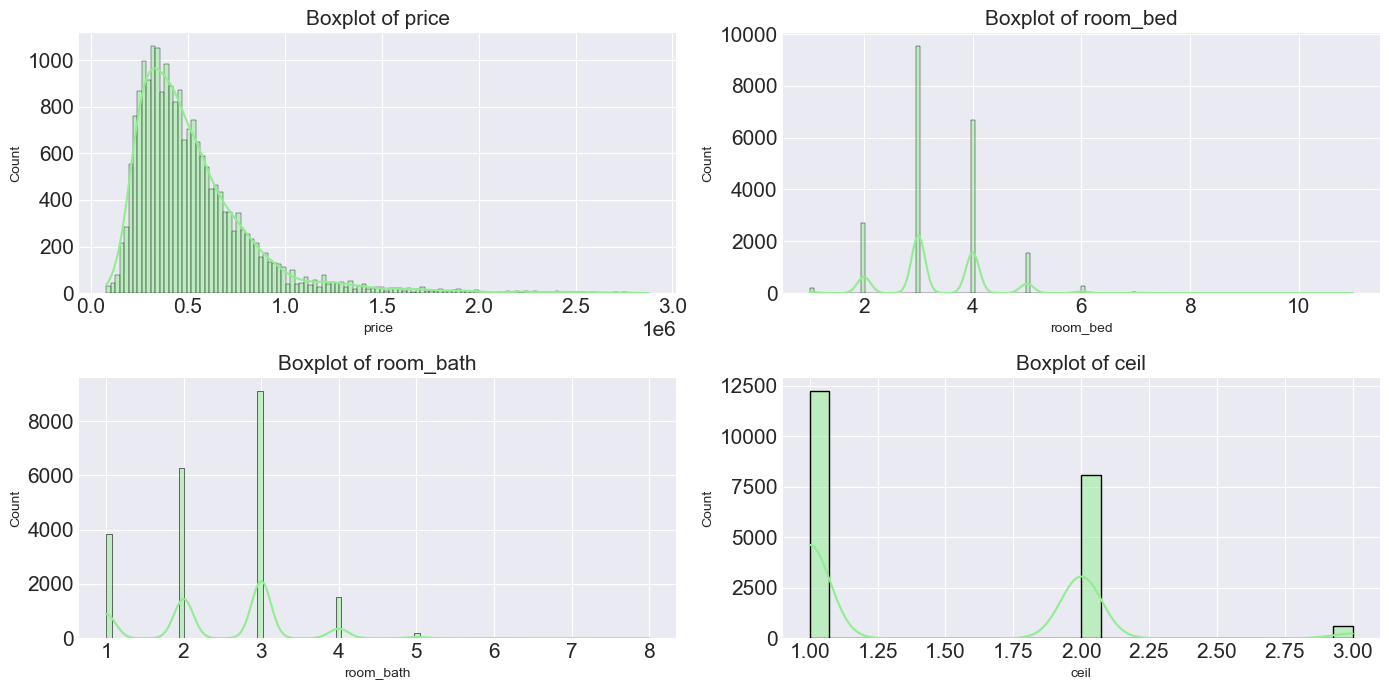

In [30]:
plt.figure(figsize = (14,7))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
feature_list_1 = ['price', 'room_bed', 'room_bath', 'ceil']
for i in range(len(feature_list_1)):
    plt.subplot(2, 2, i + 1)
    sns.histplot(x=df[feature_list_1[i]], data=df,color='lightgreen',kde=True)
    plt.title('Boxplot of {}'.format(feature_list_1[i]))
    plt.tight_layout()
plt.show()

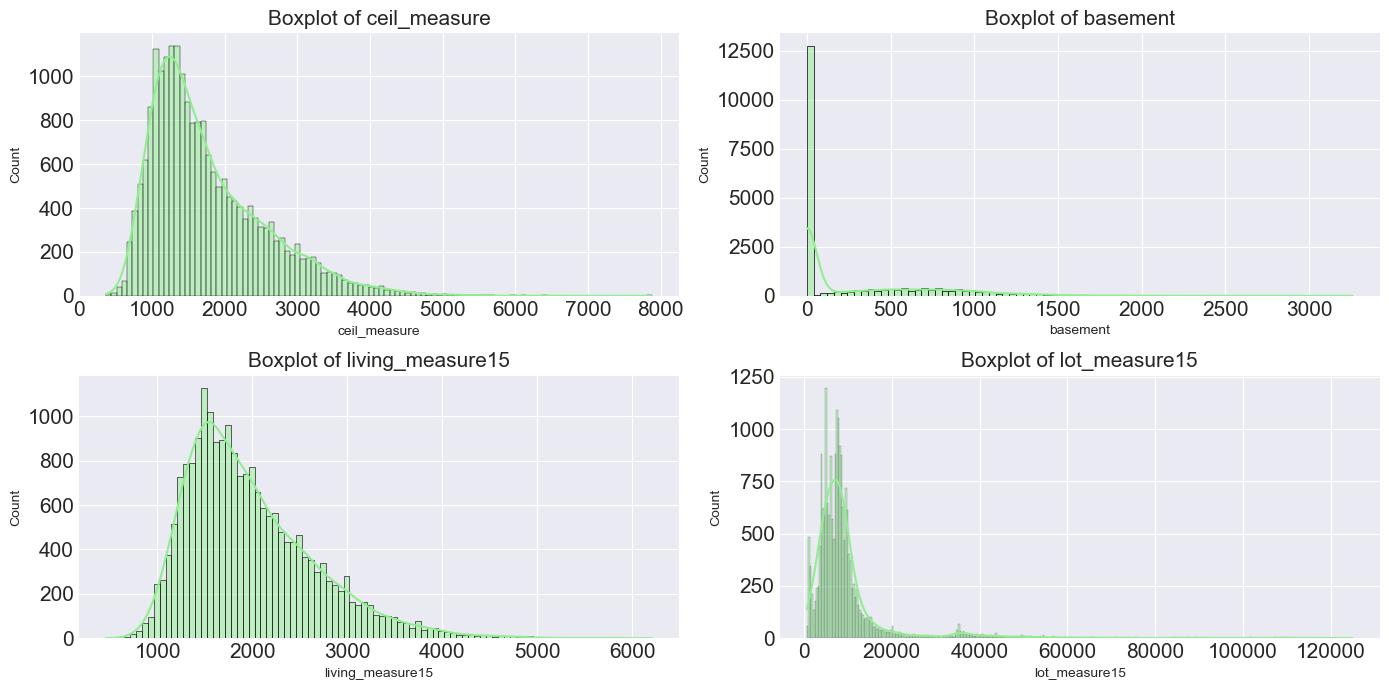

In [31]:
plt.figure(figsize = (14,7))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
feature_list_2 = ['ceil_measure', 'basement', 'living_measure15', 'lot_measure15']
for i in range(len(feature_list_2)):
    plt.subplot(2, 2, i + 1)
    sns.histplot(x=df[feature_list_2[i]], data=df,color='lightgreen',kde=True)
    plt.title('Boxplot of {}'.format(feature_list_2[i]))
    plt.tight_layout()
plt.show()

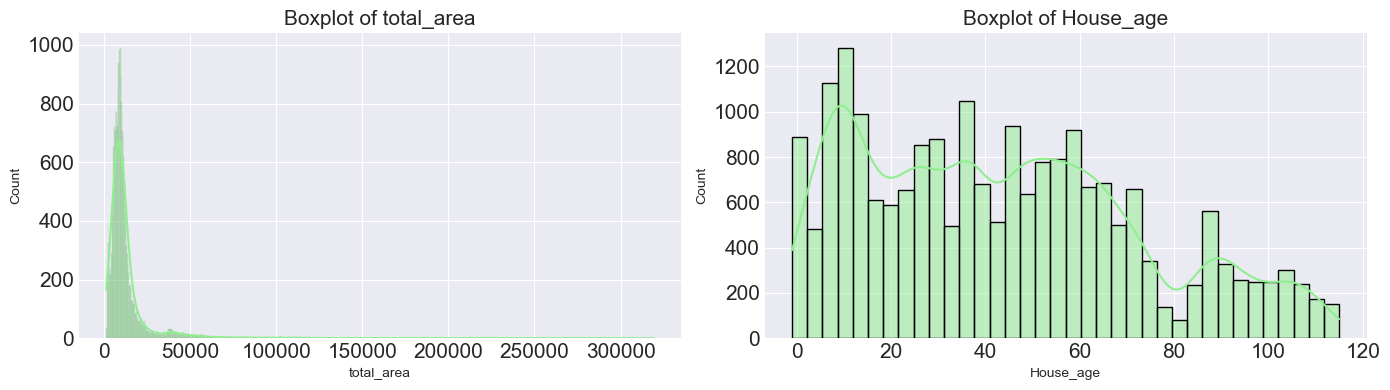

In [32]:
plt.figure(figsize = (14,4))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
feature_list_3 = ['total_area','House_age']
for i in range(len(feature_list_3)):
    plt.subplot(1, 2, i + 1)
    sns.histplot(x=df[feature_list_3[i]], data=df,color='lightgreen',kde=True)
    plt.title('Boxplot of {}'.format(feature_list_3[i]))
    plt.tight_layout()
plt.show()

In [33]:
obj = df.select_dtypes('object')

In [34]:
obj.columns

Index(['coast', 'sight', 'condition', 'quality', 'furnished', 'location',
       'is_renovated'],
      dtype='object')

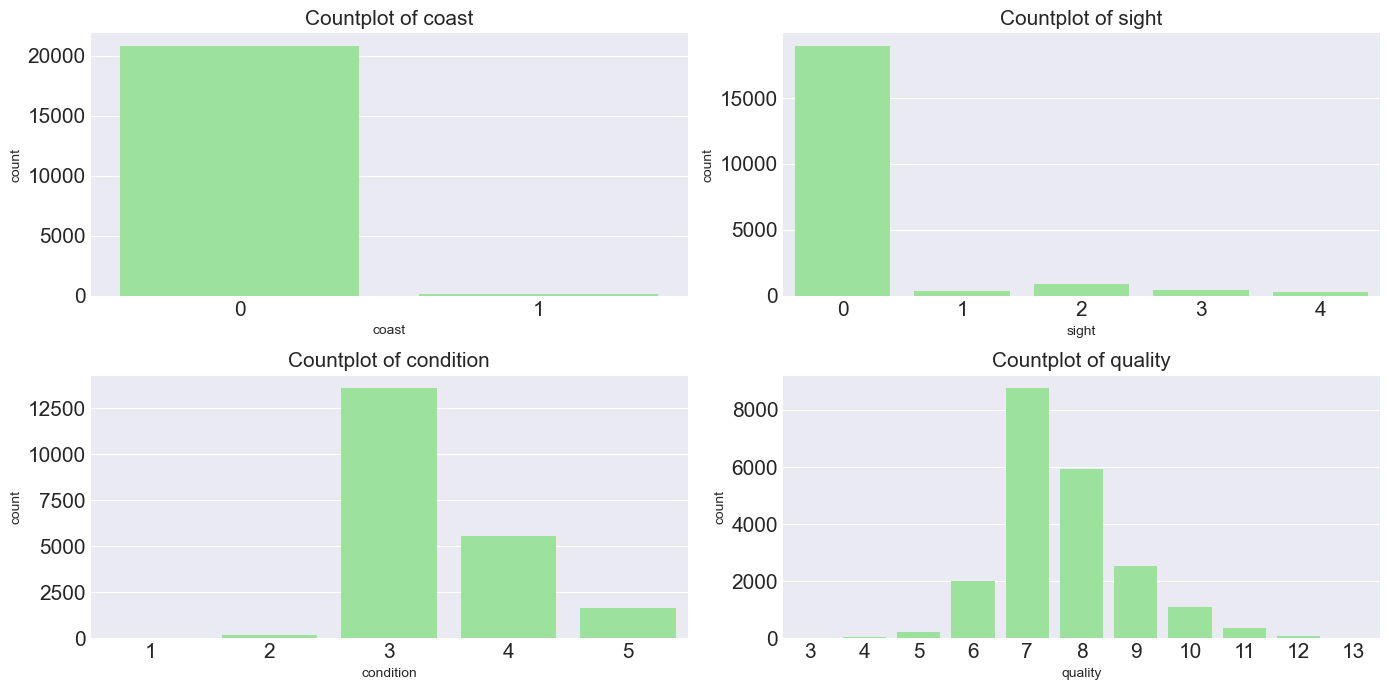

In [35]:
plt.figure(figsize = (14,7))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
feature_list_1 = ['coast', 'sight', 'condition', 'quality']
for i in range(len(feature_list_1)):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=df[feature_list_1[i]], data=df,color='lightgreen')
    plt.title('Countplot of {}'.format(feature_list_1[i]))
    plt.tight_layout()
plt.show()

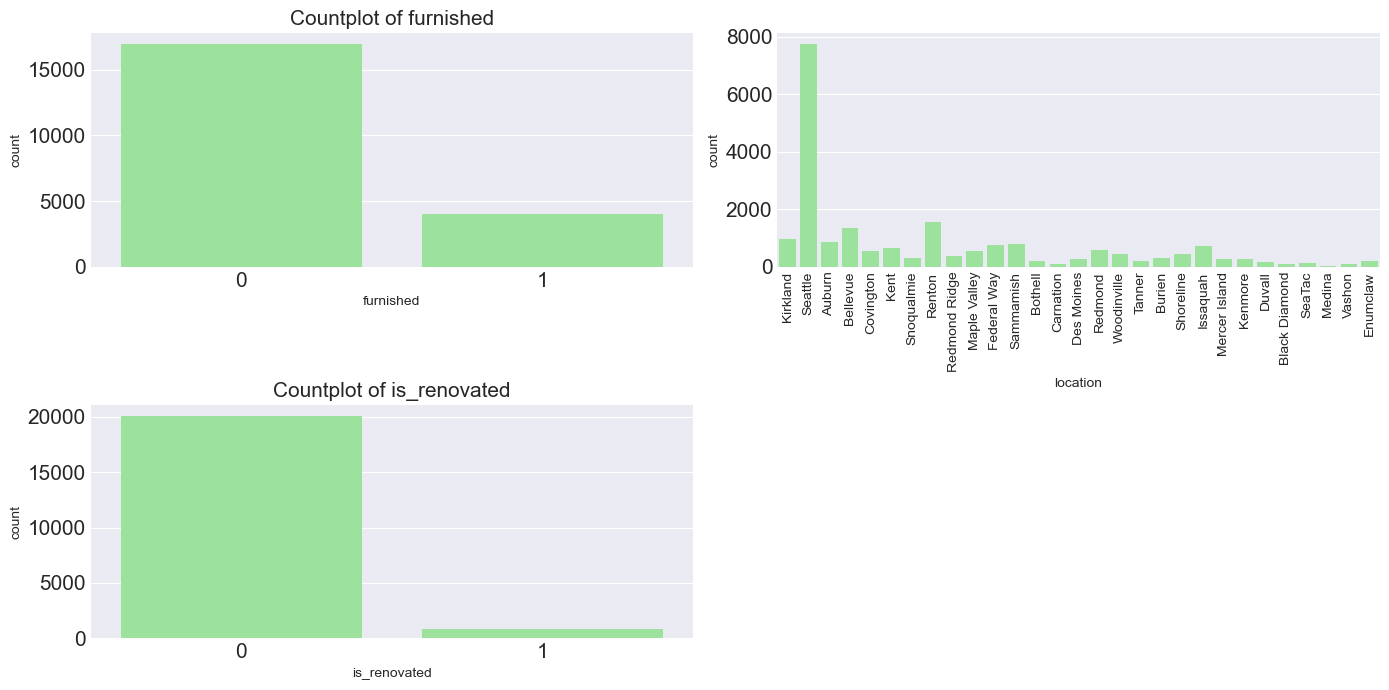

In [36]:
plt.figure(figsize=(14, 7))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

feature_list_1 = ['furnished', 'location', 'is_renovated']

for i in range(len(feature_list_1)):
    plt.subplot(2, 2, i + 1)
    if feature_list_1[i] == 'location':
        sns.countplot(x=df[feature_list_1[i]], data=df, color='lightgreen')
        plt.xticks(rotation=90,fontsize=10)
        plt.xlabel('location', fontsize=10)
    else:
        sns.countplot(x=df[feature_list_1[i]], data=df, color='lightgreen')
        plt.title('Countplot of {}'.format(feature_list_1[i]))
    plt.tight_layout()

plt.show()


#### Inference:
1.

### Bi-Variate analysis 

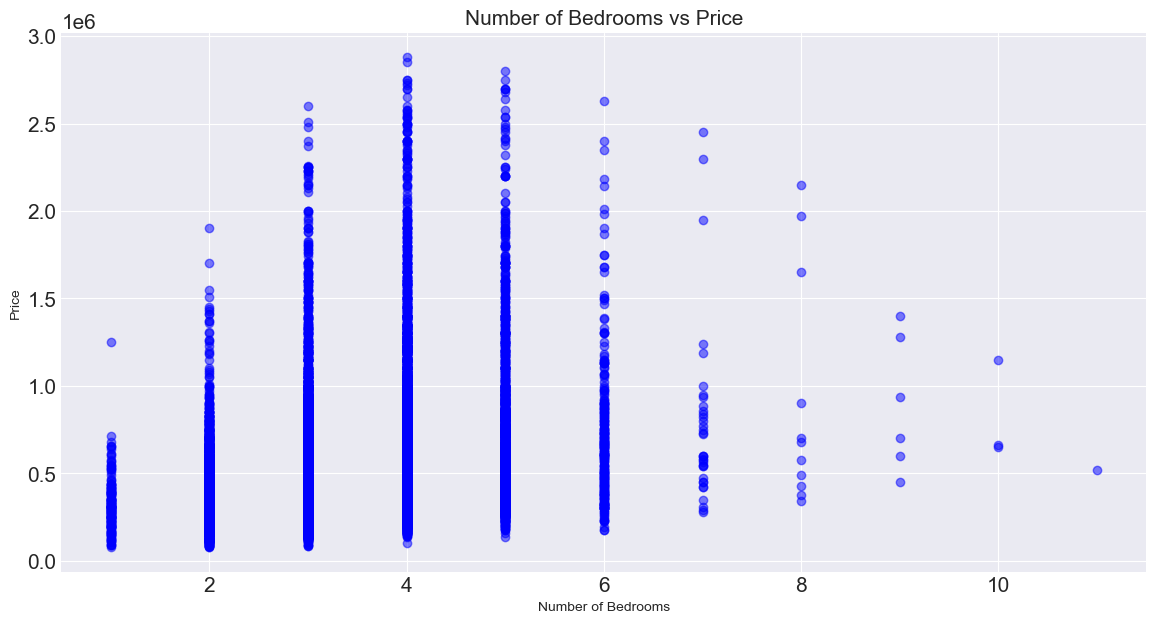

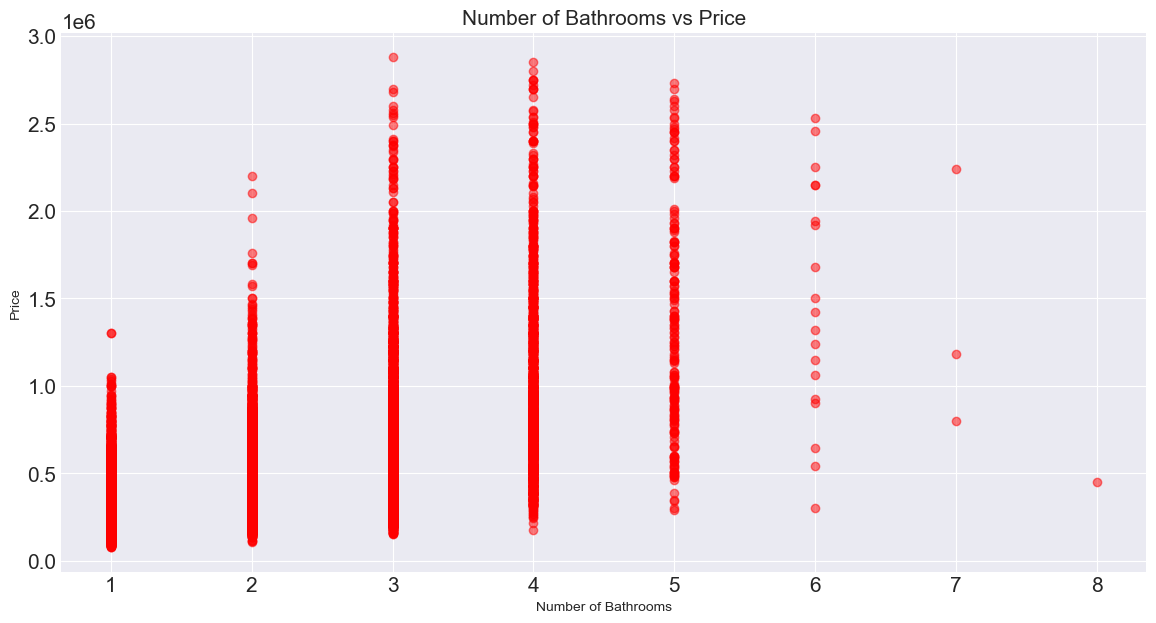

In [37]:
plt.figure(figsize=(14, 7))
plt.scatter(df['room_bed'], df['price'], color='b', alpha=0.5)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Number of Bedrooms vs Price')

plt.figure(figsize=(14, 7))
plt.scatter(df['room_bath'], df['price'], color='r', alpha=0.5)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title('Number of Bathrooms vs Price')

plt.show()


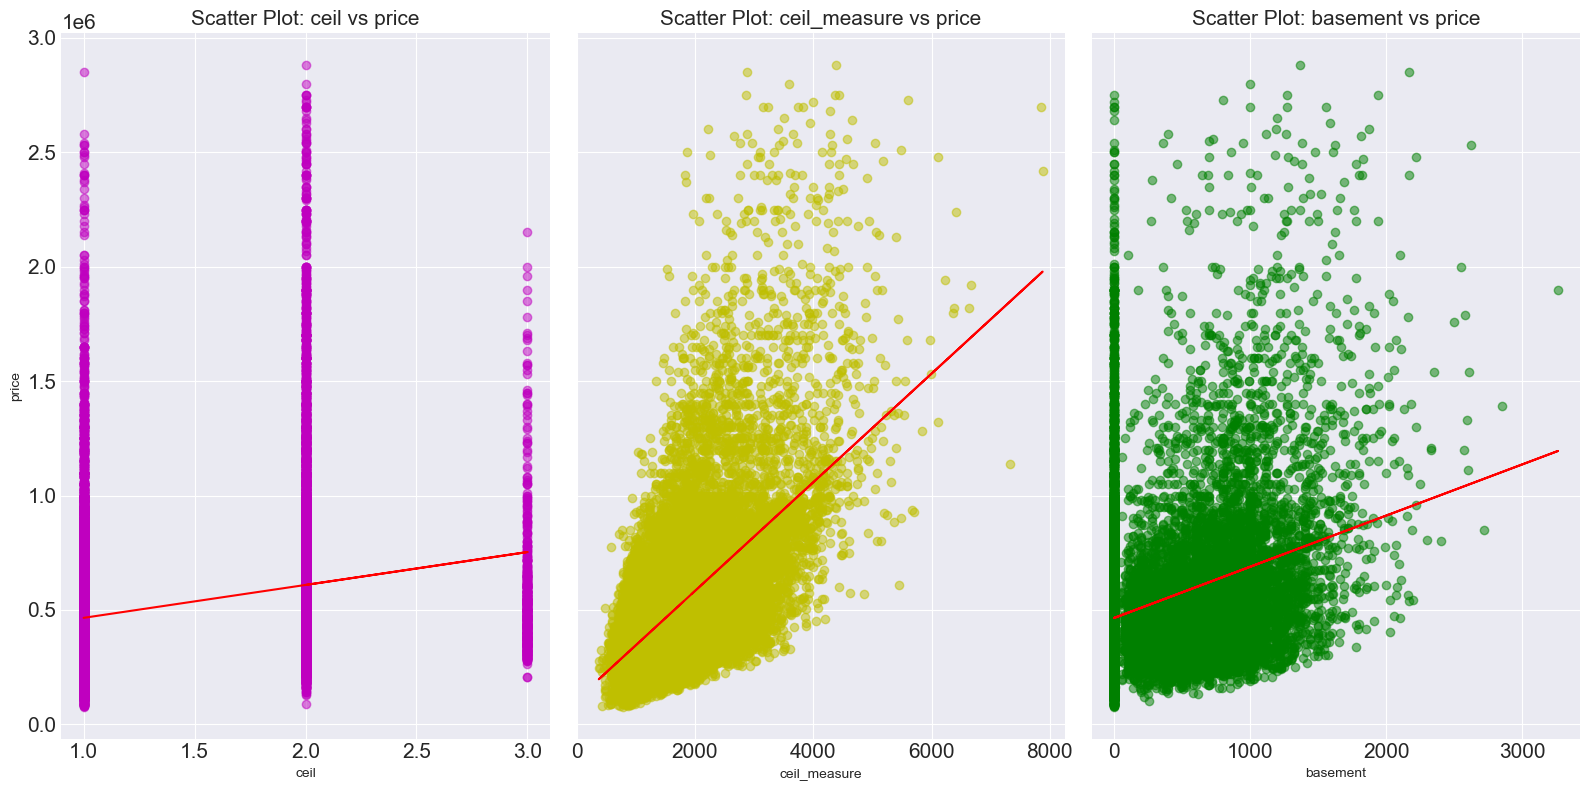

In [38]:


fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharey=True)

# Scatter plot for 'ceil' vs 'price' with trend line
axs[0].scatter(df['ceil'], df['price'], color='m', alpha=0.5)
axs[0].set_xlabel('ceil')
axs[0].set_ylabel('price')
axs[0].set_title('Scatter Plot: ceil vs price')

# Fit a linear regression line to 'ceil' vs 'price'
ceil_coef = np.polyfit(df['ceil'], df['price'], 1)
ceil_line = np.poly1d(ceil_coef)
axs[0].plot(df['ceil'], ceil_line(df['ceil']), color='red')

# Scatter plot for 'ceil_measure' vs 'price' with trend line
axs[1].scatter(df['ceil_measure'], df['price'], color='y', alpha=0.5)
axs[1].set_xlabel('ceil_measure')
axs[1].set_title('Scatter Plot: ceil_measure vs price')

# Fit a linear regression line to 'ceil_measure' vs 'price'
ceil_measure_coef = np.polyfit(df['ceil_measure'], df['price'], 1)
ceil_measure_line = np.poly1d(ceil_measure_coef)
axs[1].plot(df['ceil_measure'], ceil_measure_line(df['ceil_measure']), color='red')

# Scatter plot for 'basement' vs 'price' with trend line
axs[2].scatter(df['basement'], df['price'], color='g', alpha=0.5)
axs[2].set_xlabel('basement')
axs[2].set_title('Scatter Plot: basement vs price')

# Fit a linear regression line to 'basement' vs 'price'
basement_coef = np.polyfit(df['basement'], df['price'], 1)
basement_line = np.poly1d(basement_coef)
axs[2].plot(df['basement'], basement_line(df['basement']), color='red')

plt.tight_layout()
plt.show()


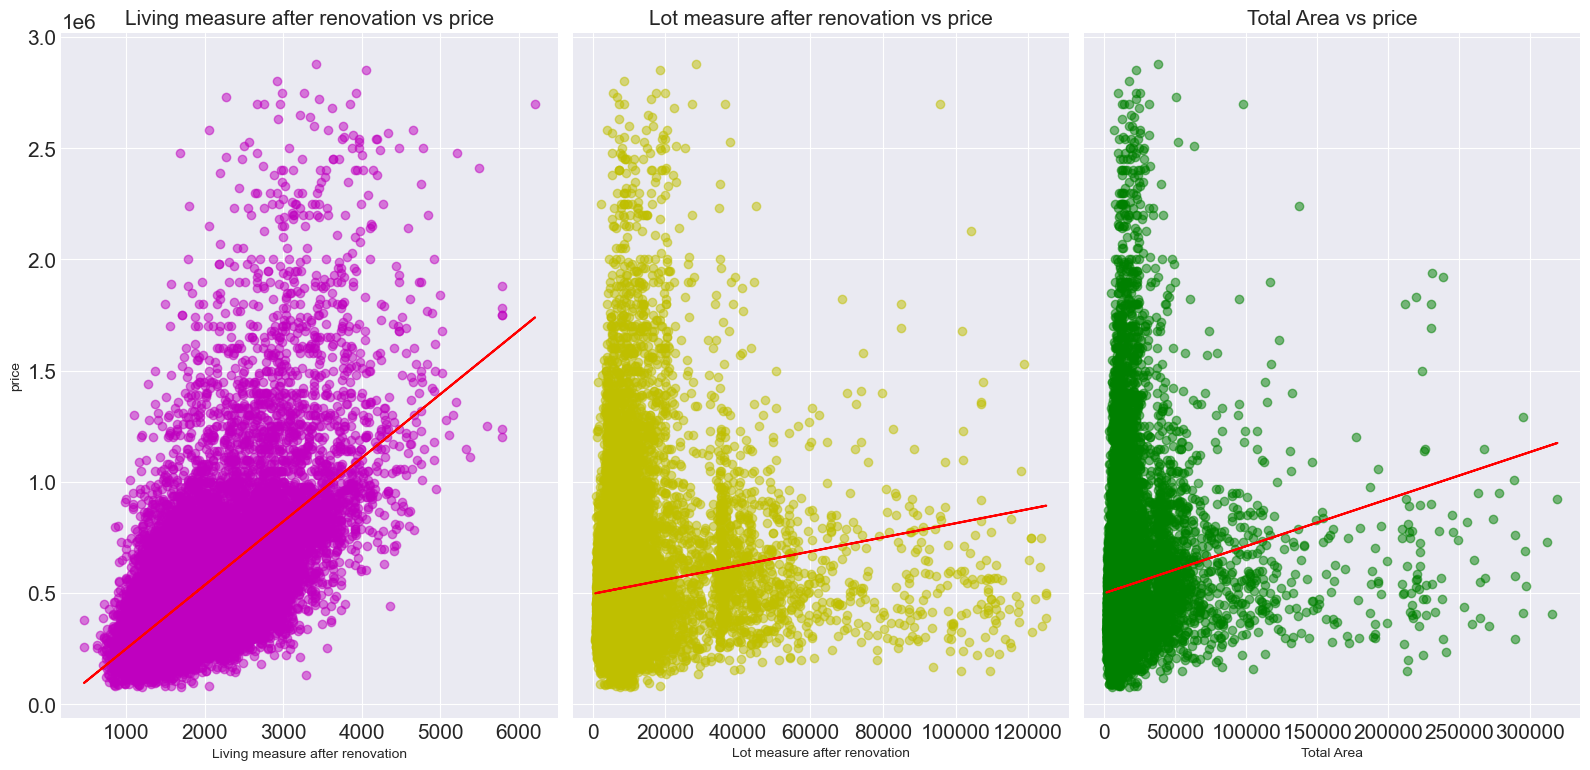

In [39]:


fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharey=True)

# Scatter plot for 'living_measure15' vs 'price' with trend line
axs[0].scatter(df['living_measure15'], df['price'], color='m', alpha=0.5)
axs[0].set_xlabel('Living measure after renovation')
axs[0].set_ylabel('price')
axs[0].set_title('Living measure after renovation vs price')

# Fit a linear regression line to 'living_measure15' vs 'price'
living_measure15_coef = np.polyfit(df['living_measure15'], df['price'], 1)
living_measure15_line = np.poly1d(living_measure15_coef)
axs[0].plot(df['living_measure15'], living_measure15_line(df['living_measure15']), color='red')

# Scatter plot for 'lot_measure15' vs 'price' with trend line
axs[1].scatter(df['lot_measure15'], df['price'], color='y', alpha=0.5)
axs[1].set_xlabel('Lot measure after renovation')
axs[1].set_title('Lot measure after renovation vs price')

# Fit a linear regression line to 'lot_measure15' vs 'price'
lot_measure15_coef = np.polyfit(df['lot_measure15'], df['price'], 1)
lot_measure15_line = np.poly1d(lot_measure15_coef)
axs[1].plot(df['lot_measure15'], lot_measure15_line(df['lot_measure15']), color='red')

# Scatter plot for 'total_area' vs 'price' with trend line
axs[2].scatter(df['total_area'], df['price'], color='g', alpha=0.5)
axs[2].set_xlabel('Total Area')
axs[2].set_title('Total Area vs price')

# Fit a linear regression line to 'total_area' vs 'price'
total_area_coef = np.polyfit(df['total_area'], df['price'], 1)
total_area_line = np.poly1d(total_area_coef)
axs[2].plot(df['total_area'], total_area_line(df['total_area']), color='red')

plt.tight_layout()
plt.show()


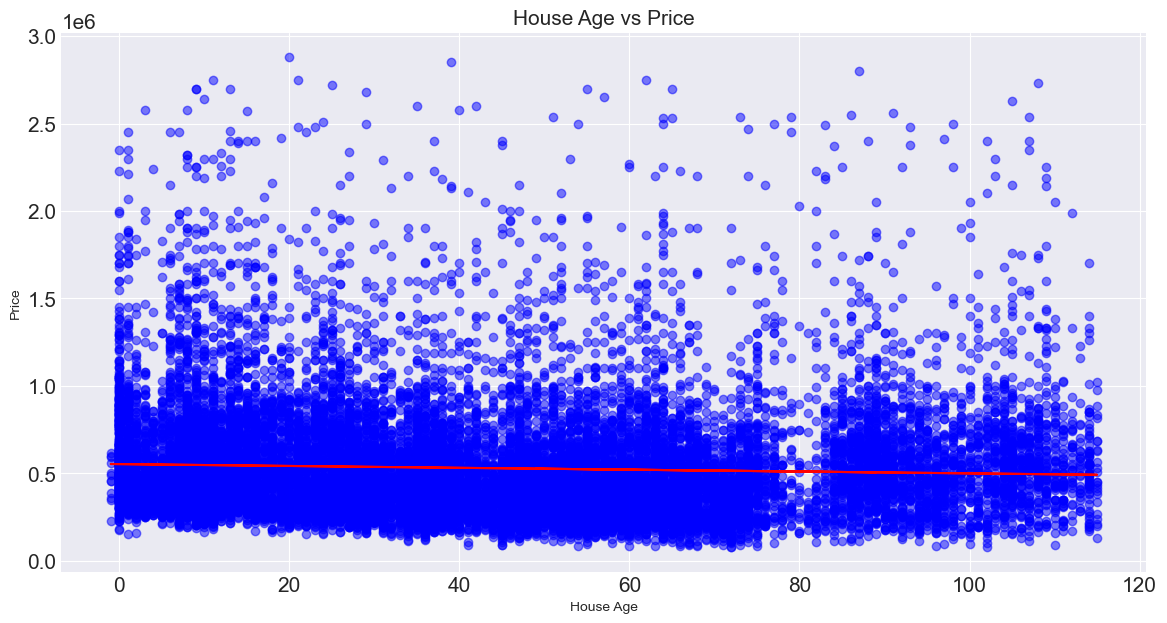

In [40]:

plt.figure(figsize=(14, 7))
plt.scatter(df['House_age'], df['price'], color='b', alpha=0.5)
plt.xlabel('House Age')
plt.ylabel('Price')
plt.title('House Age vs Price')

# Calculate coefficients and create a trendline
coefficients = np.polyfit(df['House_age'], df['price'], 1)
trendline = np.poly1d(coefficients)
plt.plot(df['House_age'], trendline(df['House_age']), color='r')

plt.show()


In [41]:
categorical_cols = ['coast', 'sight', 'condition', 'quality']



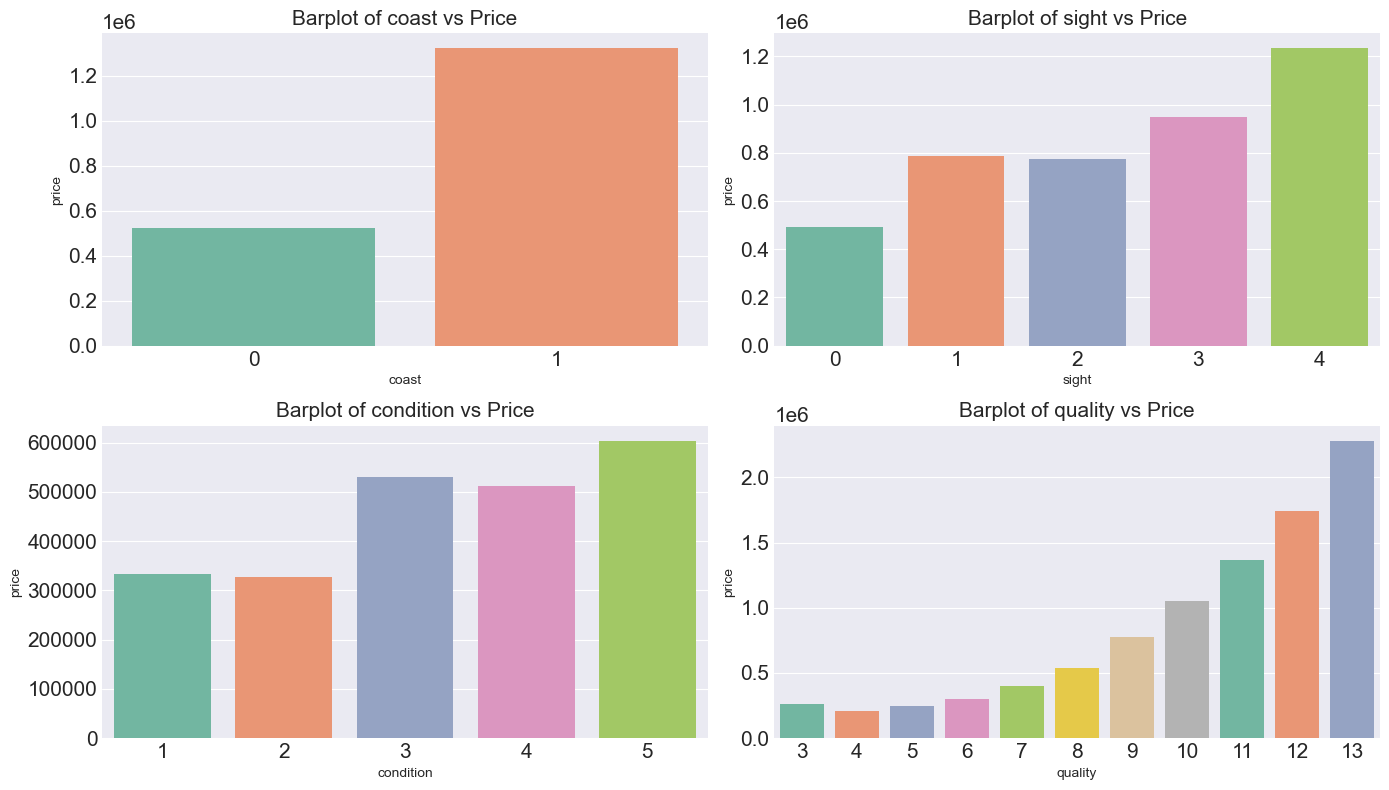

In [42]:
plt.figure(figsize = (14,8))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
feature_list_1 = ['coast', 'sight', 'condition', 'quality']
for i in range(len(feature_list_1)):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x=df[feature_list_1[i]],y='price', data=df,palette='Set2',errorbar=None)
    plt.title('Barplot of {} vs Price'.format(feature_list_1[i]))
    plt.tight_layout()
plt.show()


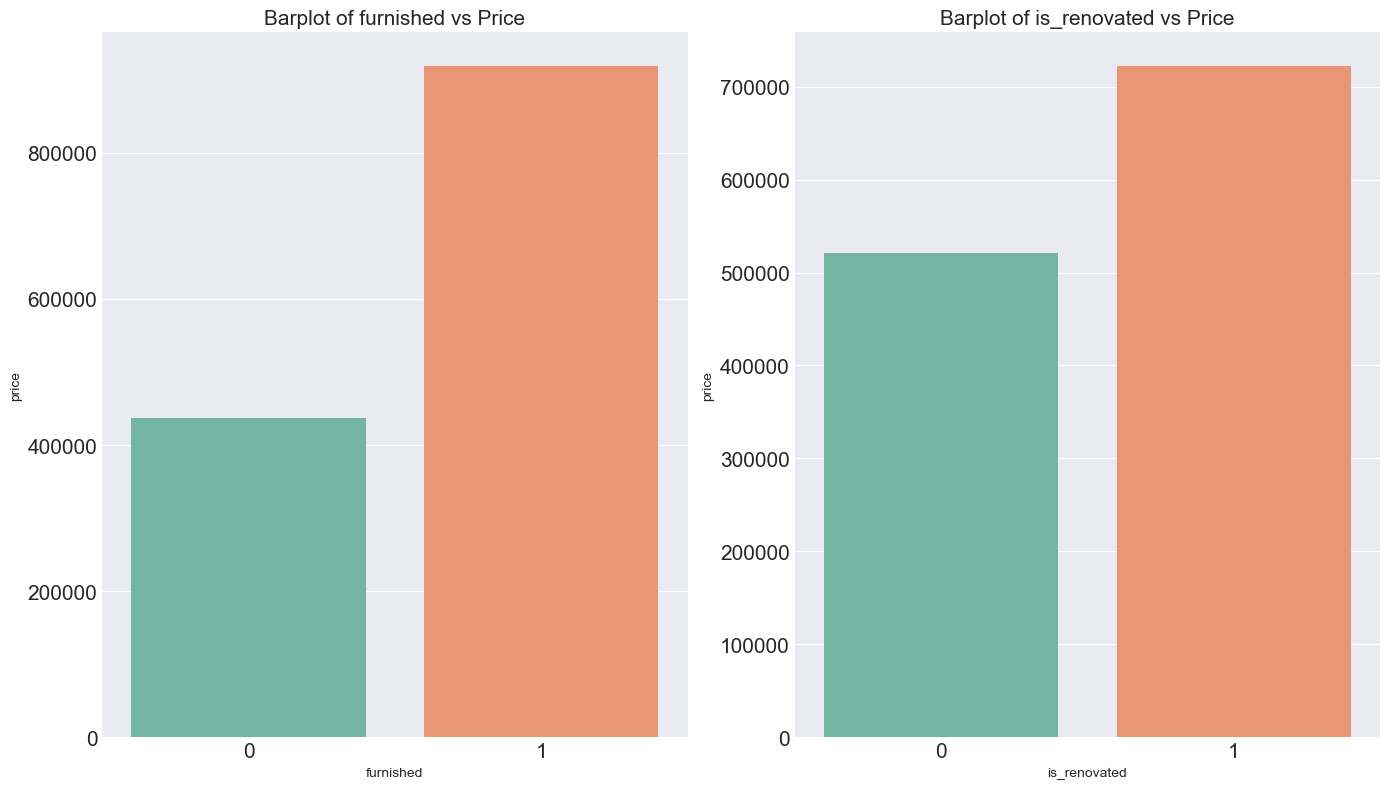

In [43]:
plt.figure(figsize = (14,8))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
feature_list_2 = ['furnished','is_renovated']
for i in range(len(feature_list_2)):
    plt.subplot(1, 2, i + 1)
    sns.barplot(x=df[feature_list_2[i]],y='price', data=df,palette='Set2',errorbar=None)
    plt.title('Barplot of {} vs Price'.format(feature_list_2[i]))
    plt.tight_layout()
plt.show()


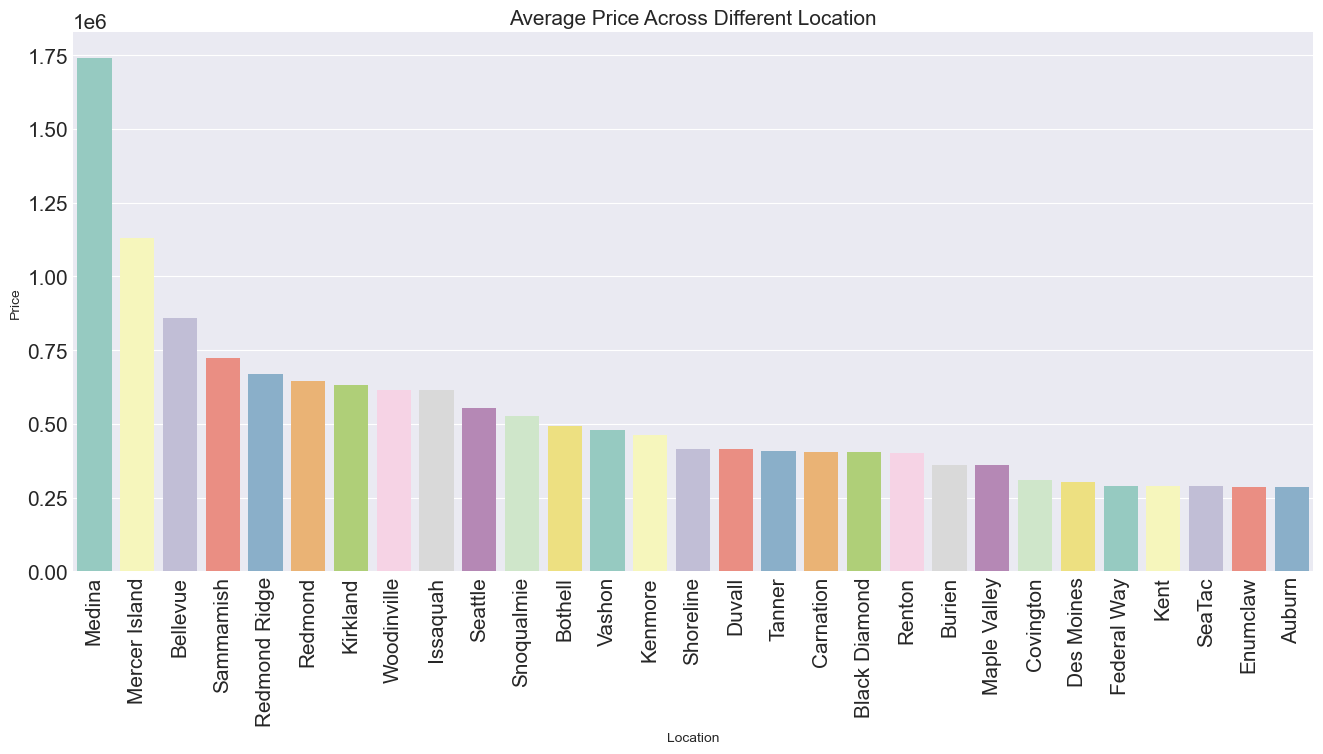

In [44]:
plt.rcParams['figure.figsize'] = (16,7)
# Calculate the sum of prices by location
sum_prices = df.groupby('location')['price'].mean().reset_index()
sum_prices= sum_prices.sort_values(by='price',ascending=False)
# Set the color


# Create the bar plot
sns.barplot(x='location', y='price', data=sum_prices, palette='Set3')
plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Average Price Across Different Location')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()


Text(0.5, 1.0, 'Correlation Heatmap of Features')

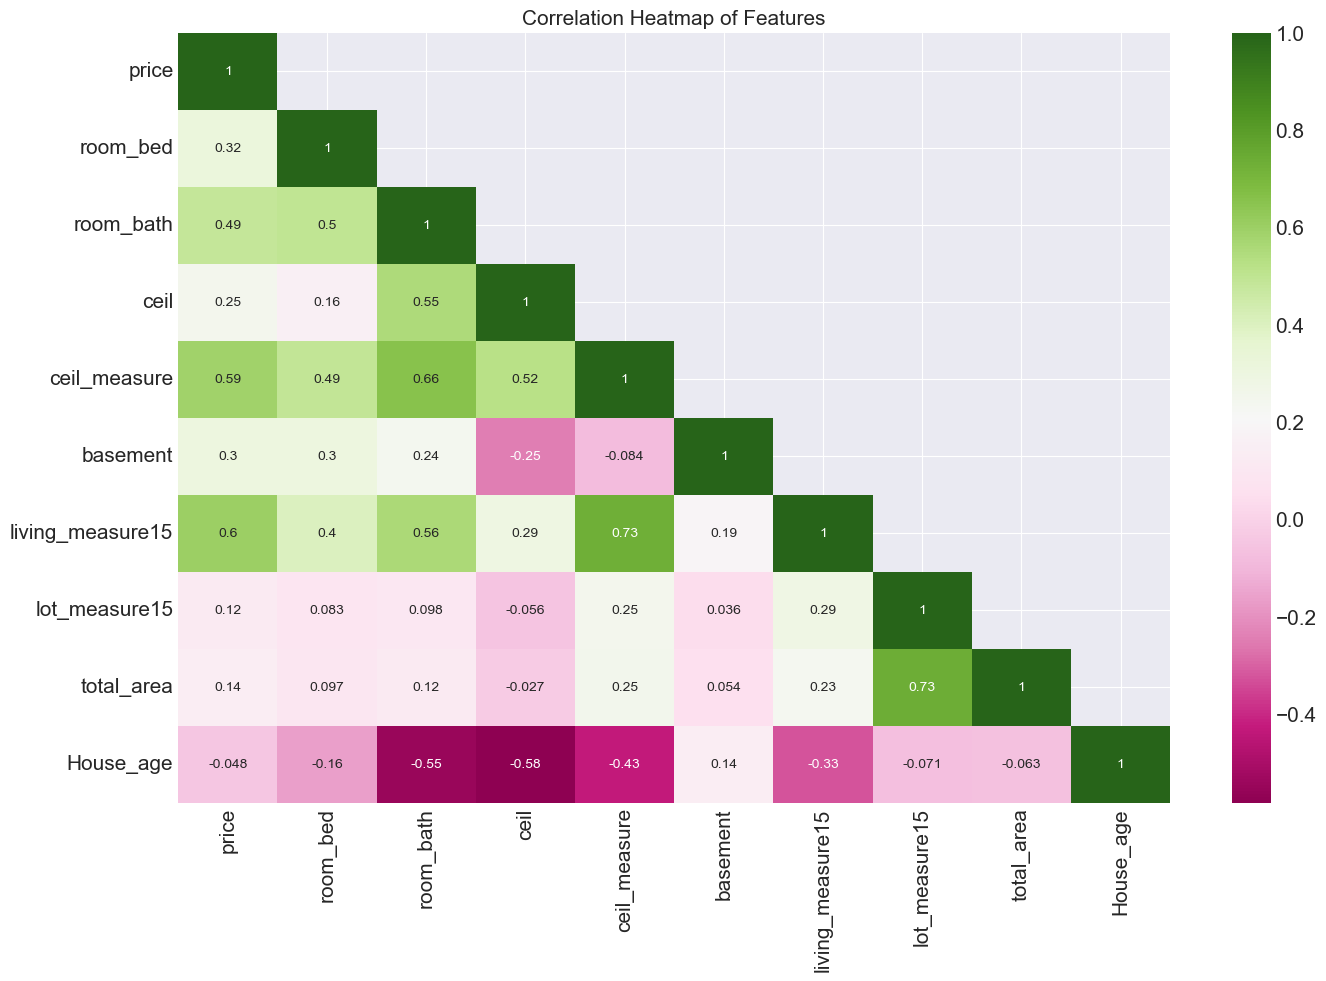

In [45]:
plt.rcParams['figure.figsize'] = (16,10)
sns.heatmap(data=df.corr(),annot=True,mask=np.triu(df.corr(),1),cmap="PiYG")
plt.title('Correlation Heatmap of Features')

In [46]:
df['quality'].value_counts()

7     8758
8     5927
9     2520
6     1989
10    1085
11     357
5      234
12      64
4       27
13       5
3        1
Name: quality, dtype: int64

<Figure size 1400x1000 with 0 Axes>

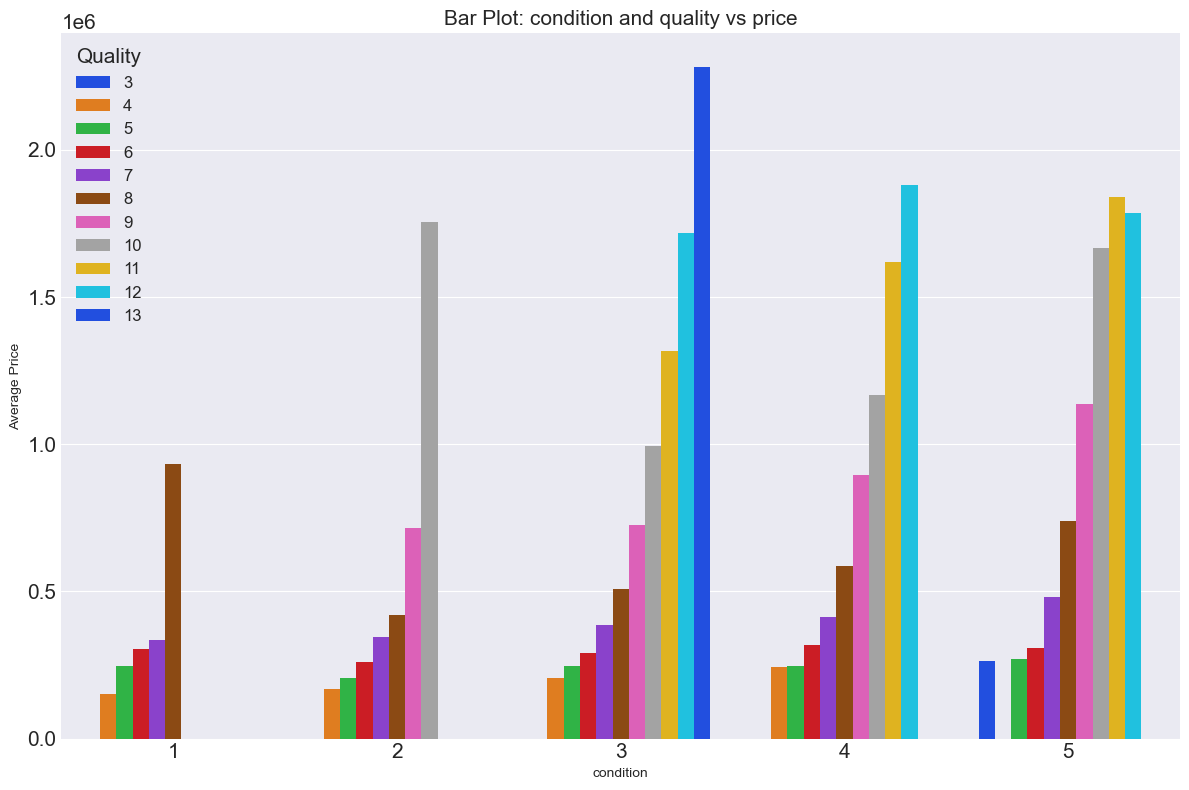

In [47]:
plt.figure(figsize=(14, 10))

plt.figure(figsize=(12, 8))

# Grouped bar plot: condition and quality vs price
ax = sns.barplot(x='condition', y='price', hue='quality', data=df, palette='bright', errcolor='gray', errwidth=0, ci=None)

plt.xlabel('condition')
plt.ylabel('Average Price')
plt.title('Bar Plot: condition and quality vs price')
legend = ax.legend(title='Quality', loc='upper left', fontsize='large')
legend.get_title().set_fontsize('15')
legend.get_frame().set_facecolor('lightgray')

plt.tight_layout()
plt.show()



## K-MEANS CLUSTERING 

In [48]:
from sklearn.cluster import KMeans

In [49]:
data = df.drop('location', axis=1).copy()

In [50]:
data_1 = df.copy()

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [52]:
wcss = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

In [53]:
wcss

[335472.00000000023,
 261164.32827154745,
 230013.49232239428,
 206562.20365362038,
 187164.19463098442,
 169639.25229535508,
 152627.87880075662,
 142993.88375436226,
 135906.96168436646,
 130762.94867499066,
 125711.93202607751,
 120857.0651059173]

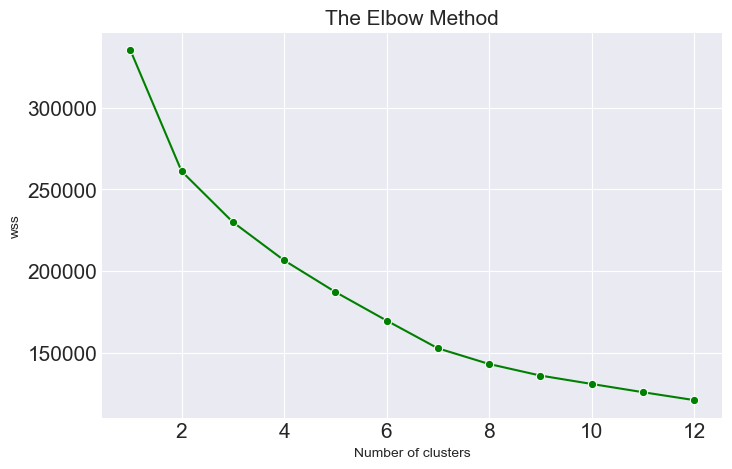

In [54]:
plt.figure(figsize=(8,5))
sns.lineplot(x = range(1,13),y=wcss,marker='o',color='green')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wss')
plt.show()

In [55]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(scaled_data)

KMeans(n_clusters=4, random_state=1)

In [56]:
data_1['cluster'] = kmeans.labels_

In [57]:
data_1

,price,room_bed,room_bath,ceil,coast,sight,condition,quality,ceil_measure,basement,living_measure15,lot_measure15,furnished,total_area,location,House_age,is_renovated,cluster
0,600000,4,2,1,0,0,3,8,1800,1250,2020,8660,0,12490,Kirkland,49,0,0
1,190000,2,1,1,0,0,4,6,670,0,1660,4100,0,3771,Seattle,67,0,0
2,735000,4,3,2,1,4,3,8,3040,0,2620,2433,0,5455,Seattle,48,0,2
3,257000,3,3,2,0,0,3,8,1740,0,2030,3794,0,5461,Auburn,5,0,3
4,450000,2,1,1,0,0,3,7,1120,0,1120,5100,0,5710,Seattle,91,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20962,685530,4,3,2,0,0,3,9,3130,0,2780,44224,1,63597,Carnation,19,0,1
20963,535000,2,1,1,0,0,3,7,920,110,1530,4944,0,5871,Seattle,75,0,0
20964,998000,3,4,2,0,0,3,10,2910,800,2390,34412,1,38122,Sammamish,36,0,1
20965,262000,4,3,2,0,0,3,7,1560,0,1160,7800,0,9360,Seattle,18,0,3


In [58]:
data_1.dtypes

price                int64
room_bed             int64
room_bath            int64
ceil                 int64
coast               object
sight               object
condition           object
quality             object
ceil_measure         int64
basement             int64
living_measure15     int64
lot_measure15        int64
furnished           object
total_area           int64
location            object
House_age            int64
is_renovated        object
cluster              int32
dtype: object

In [59]:
cluster_means = {}

for cluster in range(5):
    if cluster in data_1['cluster'].unique():
        cluster_data = data_1[data_1['cluster'] == cluster]
        cluster_numeric_columns = cluster_data.select_dtypes(include='int64')
        cluster_mean = cluster_numeric_columns.mean().round(2)
        cluster_means[cluster] = cluster_mean

# Convert cluster_means dictionary to a DataFrame
cluster_means_df = pd.DataFrame(cluster_means)

print("Mean values for each cluster:")
print(cluster_means_df)


Mean values for each cluster:
                          0          1           2          3
price             423263.46  920264.68  1322198.81  445184.78
room_bed               3.17       3.93        3.17       3.38
room_bath              1.89       3.31        2.79       2.95
ceil                   1.04       1.81        1.56       2.06
ceil_measure        1312.84    2877.91     2186.06    1932.29
basement             343.99     379.98      548.83      86.59
living_measure15    1682.69    2883.32     2516.48    1919.42
lot_measure15       9421.84   16938.56    20656.77    6503.68
total_area         12266.22   25349.69    22693.32    8736.00
House_age             60.94      26.79       54.41      16.90


In [60]:
cluster_modes = {}

for cluster in range(5):
    if cluster in data_1['cluster'].unique():
        cluster_data = data_1[data_1['cluster'] == cluster]
        cluster_obj_columns = cluster_data.select_dtypes(include='object')
        cluster_modes[cluster] = cluster_obj_columns.mode().iloc[0]

# Convert cluster_modes dictionary to a DataFrame
cluster_modes_df = pd.DataFrame(cluster_modes)

print("Most frequent values for each object column within each cluster:")
print(cluster_modes_df)


Most frequent values for each object column within each cluster:
                    0        1        2        3
coast               0        0        1        0
sight               0        0        4        0
condition           3        3        3        3
quality             7        9        8        8
furnished           0        1        0        0
location      Seattle  Seattle  Seattle  Seattle
is_renovated        0        0        0        0


### For model building purpose we will reduce the values in location (below 500 threshold will be regarded as Other location)

In [61]:
df.shape

(20967, 17)

In [62]:
threshold = 500
location_counts = df['location'].value_counts()
locations_to_replace = location_counts[location_counts <= threshold].index
df['location'] = np.where(df['location'].isin(locations_to_replace), 'Others', df['location'])


In [63]:
df['location'].value_counts()

Seattle         7736
Others          3893
Renton          1572
Bellevue        1364
Kirkland         961
Auburn           873
Sammamish        785
Federal Way      771
Issaquah         706
Kent             644
Redmond          566
Maple Valley     559
Covington        537
Name: location, dtype: int64

In [64]:
num.columns

Index(['price', 'room_bed', 'room_bath', 'ceil', 'ceil_measure', 'basement',
       'living_measure15', 'lot_measure15', 'total_area', 'House_age'],
      dtype='object')

In [65]:
obj.columns

Index(['coast', 'sight', 'condition', 'quality', 'furnished', 'location',
       'is_renovated'],
      dtype='object')

### Before encoding a copy is created for dataset 

In [66]:
df_c = df.copy()

## ENCODING 

In [67]:
df_c.dtypes


price                int64
room_bed             int64
room_bath            int64
ceil                 int64
coast               object
sight               object
condition           object
quality             object
ceil_measure         int64
basement             int64
living_measure15     int64
lot_measure15        int64
furnished           object
total_area           int64
location            object
House_age            int64
is_renovated        object
dtype: object

In [68]:
#First we will check categorical columns

In [69]:
df['quality'].unique()

array([8, 6, 7, 10, 9, 5, 11, 4, 12, 13, 3], dtype=object)

In [70]:
# Quality is encoded as 1 to11 (the real values are from 3 to 13)
quality_mapping = {
    3: 1,
    4: 2,
    5: 3,
    6: 4,
    7: 5,
    8: 6,
    9: 7,
    10: 8,
    11: 9,
    12: 10,
    13: 11
}

df_c['quality'] = df_c['quality'].map(quality_mapping)

In [71]:
df_c['quality'].value_counts()

5     8758
6     5927
7     2520
4     1989
8     1085
9      357
3      234
10      64
2       27
11       5
1        1
Name: quality, dtype: int64

### Condition column doesnot needs to be encoded 
1: Poor condition
2: Fair condition
3: Average condition
4: Good condition
5: Excellent condition

In [72]:
df_c['condition'] = df_c['condition'].astype('category')
df_c['quality'] = df_c['quality'].astype('category')

###  Sight column enconding
0: No view
1: Minimal view
2: Moderate view
3: Well view
4: Excellent view
This encoding preserves the ordinal nature of the variable, allowing the model to understand and capture the relationship between different levels of viewing.

In [73]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

df_c['sight'] = label_encoder.fit_transform(df_c['sight'])


### One_hot encoding can be used for columns such as 'location','furnished','is_renovated','coast'

In [74]:

columns_to_encode = ['coast', 'furnished', 'location', 'is_renovated','condition','quality']

df_encoded = pd.get_dummies(df_c[columns_to_encode], drop_first=True)

# Concatenate encoded columns with original dataframe
df_c = pd.concat([df_c.drop(columns_to_encode, axis=1), df_encoded], axis=1)


In [75]:
df_c.head()

,price,room_bed,room_bath,ceil,sight,ceil_measure,basement,living_measure15,lot_measure15,total_area,...,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11
0,600000,4,2,1,0,1800,1250,2020,8660,12490,...,0,0,0,0,1,0,0,0,0,0
1,190000,2,1,1,0,670,0,1660,4100,3771,...,0,0,1,0,0,0,0,0,0,0
2,735000,4,3,2,4,3040,0,2620,2433,5455,...,0,0,0,0,1,0,0,0,0,0
3,257000,3,3,2,0,1740,0,2030,3794,5461,...,0,0,0,0,1,0,0,0,0,0
4,450000,2,1,1,0,1120,0,1120,5100,5710,...,0,0,0,1,0,0,0,0,0,0


## Scaling the data (Numeric columns)

In [76]:
num.columns

Index(['price', 'room_bed', 'room_bath', 'ceil', 'ceil_measure', 'basement',
       'living_measure15', 'lot_measure15', 'total_area', 'House_age'],
      dtype='object')

In [77]:
num.skew()

price               2.381963
room_bed            0.542425
room_bath           0.030538
ceil                0.736624
ceil_measure        1.280652
basement            1.458665
living_measure15    1.085886
lot_measure15       4.755246
total_area          7.215162
House_age           0.460145
dtype: float64

In [78]:
# Checking the significance of correlation


In [79]:
import numpy as np

# Select the numerical columns
numerical_columns = ['price', 'room_bed', 'room_bath', 'ceil', 'ceil_measure', 'basement', 'living_measure15', 'lot_measure15', 'total_area', 'House_age']

# Apply log transformation to the numerical columns
df_c[numerical_columns] = np.log1p(df_c[numerical_columns])


In [100]:
df_c[numerical_columns].skew()

price               0.313437
room_bed           -0.357638
room_bath          -0.537843
ceil                0.541492
ceil_measure        0.231428
basement            0.484982
living_measure15    0.204952
lot_measure15       0.374435
total_area          1.018204
House_age                NaN
dtype: float64

In [103]:
df_c[df_c['House_age']==0]

,price,room_bed,room_bath,ceil,sight,ceil_measure,basement,living_measure15,lot_measure15,total_area,...,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11
45,13.815462,1.609438,1.609438,1.098612,0,7.736744,6.928538,7.523481,8.466110,8.986572,...,0,0,0,0,0,1,0,0,0,0
153,13.669708,1.791759,1.609438,1.098612,0,8.155075,0.000000,8.119994,8.593969,9.209140,...,0,0,0,0,0,1,0,0,0,0
365,13.919871,1.609438,1.609438,1.098612,0,7.951911,6.710523,8.074338,8.442685,9.038484,...,0,0,0,0,0,1,0,0,0,0
430,13.573377,1.609438,1.386294,1.386294,0,7.951911,0.000000,7.965893,8.349484,8.863333,...,0,0,0,0,0,1,0,0,0,0
484,13.398480,1.098612,1.386294,1.098612,0,7.013016,5.831882,7.390799,7.284135,7.887584,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20824,13.258294,1.386294,1.386294,1.098612,0,7.775276,6.836259,7.886457,8.550048,8.986321,...,0,0,0,0,0,1,0,0,0,0
20834,13.122365,1.386294,1.098612,1.386294,0,7.353082,0.000000,7.353082,7.455298,7.907284,...,0,0,0,0,1,0,0,0,0,0
20838,13.697854,1.609438,1.609438,1.386294,0,8.074338,0.000000,7.215975,8.517393,9.013230,...,0,0,0,0,0,1,0,0,0,0
20888,13.095898,1.609438,1.386294,1.098612,0,8.086718,0.000000,7.868254,9.578380,9.717820,...,0,0,0,0,0,1,0,0,0,0


In [80]:
df_c

,price,room_bed,room_bath,ceil,sight,ceil_measure,basement,living_measure15,lot_measure15,total_area,...,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11
0,13.304687,1.609438,1.098612,0.693147,0,7.496097,7.131699,7.611348,9.066585,9.432764,...,0,0,0,0,1,0,0,0,0,0
1,12.154785,1.098612,0.693147,0.693147,0,6.508769,0.000000,7.415175,8.318986,8.235361,...,0,0,1,0,0,0,0,0,0,0
2,13.507627,1.609438,1.386294,1.098612,4,8.019942,0.000000,7.871311,7.797291,8.604471,...,0,0,0,0,1,0,0,0,0,0
3,12.456835,1.386294,1.386294,1.098612,0,7.462215,0.000000,7.616284,8.241440,8.605570,...,0,0,0,0,1,0,0,0,0,0
4,13.017005,1.098612,0.693147,0.693147,0,7.021976,0.000000,7.021976,8.537192,8.650149,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20962,13.437949,1.609438,1.386294,1.098612,0,8.049108,0.000000,7.930566,10.697046,11.060337,...,0,0,0,0,0,1,0,0,0,0
20963,13.190024,1.098612,0.693147,0.693147,0,6.825460,4.709530,7.333676,8.506132,8.677951,...,0,0,0,1,0,0,0,0,0,0
20964,13.813510,1.386294,1.609438,1.098612,0,7.976252,6.685861,7.779467,10.446190,10.548573,...,0,0,0,0,0,0,1,0,0,0
20965,12.476104,1.609438,1.386294,1.098612,0,7.353082,0.000000,7.057037,8.962007,9.144307,...,0,0,0,1,0,0,0,0,0,0


### Statistical infernce of correlation 

### 1. Checking  statistical significance of correlations

In [81]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_c[numerical_columns])
print('The p_value is ',p_value)
print('The chi-sqaure value is ',chi_square_value)

The p_value is  nan
The chi-sqaure value is  nan


In [82]:
# We will have remove more columns to address the issue of multicollinearity

### 2. Shapiro test for checking normality of target variable

In [83]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality
stat, p_value = shapiro(df_c['price'])
print("Shapiro-Wilk Test - p-value:", p_value)


Shapiro-Wilk Test - p-value: 1.4963773004385675e-29


In [84]:
#The p-value is <0.05 for the Shapiro-Wilk test, it means that the null hypothesis of normality is rejected. 

### Train test split 

In [85]:
# independent variables
X = df_c.drop(['price'], axis=1)
# dependent variable
y = df_c['price']

In [95]:
num_2 = X.select_dtypes(['float64'])

In [96]:
num_2.columns

Index(['room_bed', 'room_bath', 'ceil', 'ceil_measure', 'basement',
       'living_measure15', 'lot_measure15', 'total_area', 'House_age'],
      dtype='object')

In [99]:
X['House_age'].value_counts()

 2.302585    453
 2.197225    430
 0.000000    422
 2.484907    417
 2.397895    412
            ... 
 4.736198     28
 4.753590     24
 4.394449     21
 4.406719     19
-inf          12
Name: House_age, Length: 117, dtype: int64

In [97]:
# Convert data types to int64
X['room_bed'] = X['room_bed'].astype('int64')
X['room_bath'] = X['room_bath'].astype('int64')
X['ceil'] = X['ceil'].astype('int64')
X['ceil_measure'] = X['ceil_measure'].astype('int64')
X['basement'] = X['basement'].astype('int64')
X['living_measure15'] = X['living_measure15'].astype('int64')
X['lot_measure15'] = X['lot_measure15'].astype('int64')
X['total_area'] = X['total_area'].astype('int64')
X['House_age'] = X['House_age'].astype('int64')


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [86]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [87]:
X.columns

Index(['room_bed', 'room_bath', 'ceil', 'sight', 'ceil_measure', 'basement',
       'living_measure15', 'lot_measure15', 'total_area', 'House_age',
       'coast_1', 'furnished_1', 'location_Bellevue', 'location_Covington',
       'location_Federal Way', 'location_Issaquah', 'location_Kent',
       'location_Kirkland', 'location_Maple Valley', 'location_Others',
       'location_Redmond', 'location_Renton', 'location_Sammamish',
       'location_Seattle', 'is_renovated_1', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'quality_2', 'quality_3', 'quality_4',
       'quality_5', 'quality_6', 'quality_7', 'quality_8', 'quality_9',
       'quality_10', 'quality_11'],
      dtype='object')

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [89]:
X_train

,room_bed,room_bath,ceil,sight,ceil_measure,basement,living_measure15,lot_measure15,total_area,House_age,...,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11
20340,1.386294,1.098612,0.693147,0,7.327123,0.000000,7.745436,8.612685,8.856661,4.369448,...,0,0,0,1,0,0,0,0,0,0
13826,1.609438,1.098612,0.693147,0,7.581210,0.000000,7.581210,9.681344,9.796793,3.555348,...,0,0,0,1,0,0,0,0,0,0
11446,1.791759,1.386294,1.098612,0,8.016648,0.000000,8.033009,8.754949,9.278933,0.000000,...,0,0,0,0,0,1,0,0,0,0
2201,1.386294,1.609438,1.386294,0,7.252054,0.000000,7.252054,7.134094,7.884953,2.302585,...,0,0,0,0,1,0,0,0,0,0
11728,1.609438,1.386294,1.098612,0,7.754053,6.580639,8.013343,8.780480,9.130214,4.488636,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,1.386294,1.098612,0.693147,0,6.976348,6.274762,7.669028,9.613202,9.670988,3.583519,...,0,0,0,1,0,0,0,0,0,0
17289,1.609438,1.386294,0.693147,0,7.438972,7.215975,7.396949,9.023649,9.480673,3.850148,...,0,0,0,0,1,0,0,0,0,0
5192,0.693147,0.693147,0.693147,0,6.660575,0.000000,6.947937,7.185387,7.503290,4.532599,...,0,0,0,1,0,0,0,0,0,0
12172,1.609438,1.386294,1.098612,0,7.901748,0.000000,7.850493,8.673171,9.050524,0.693147,...,0,0,0,1,0,0,0,0,0,0


In [90]:
X_test.dtypes

room_bed                 float64
room_bath                float64
ceil                     float64
sight                      int32
ceil_measure             float64
basement                 float64
living_measure15         float64
lot_measure15            float64
total_area               float64
House_age                float64
coast_1                    uint8
furnished_1                uint8
location_Bellevue          uint8
location_Covington         uint8
location_Federal Way       uint8
location_Issaquah          uint8
location_Kent              uint8
location_Kirkland          uint8
location_Maple Valley      uint8
location_Others            uint8
location_Redmond           uint8
location_Renton            uint8
location_Sammamish         uint8
location_Seattle           uint8
is_renovated_1             uint8
condition_2                uint8
condition_3                uint8
condition_4                uint8
condition_5                uint8
quality_2                  uint8
quality_3 

In [91]:
y_train

20340    13.511700
13826    12.814481
11446    13.637842
2201     12.969215
11728    14.207553
           ...    
10955    12.665082
17289    13.071072
5192     12.429220
12172    12.506181
235      13.120363
Name: price, Length: 14676, dtype: float64

In [92]:
y_test

19981    12.376241
10428    12.736704
12511    13.122365
19448    12.959847
12509    12.691584
           ...    
5555     14.340240
777      12.799402
16122    13.301348
18530    13.289573
3201     13.262127
Name: price, Length: 6291, dtype: float64

# MODEL_BUILDING

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [94]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [ ]:
print('The coefficient of determination R^2 of the prediction on Train set',regression_model.score(X_train, y_train))

In [ ]:
n= len(X_train)
p = len(X.columns)
adj_R2_train = 1- ((1-regression_model.score(X_train, y_train)) * (n-1)/(n-p-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
print(adj_R2_train)

In [ ]:
print('The coefficient of determination R^2 of the prediction on test set',regression_model.score(X_test, y_test))

In [ ]:

# Make predictions on the test set
y_pred = regression_model.predict(X_test)

# Create a scatter plot with green points and alpha of 0.5
plt.scatter(y_test, y_pred, color='green', alpha=0.5, label='Data Points')

# Plot a trendline
plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100), color='black', label='Trendline')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Decision Tree
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Random Forest
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)


In [ ]:


# Predict on the test data
dt_predictions = decision_tree_model.predict(X_test)

# Calculate the line of best fit
best_fit_line = np.polyfit(y_test, dt_predictions, 1)
best_fit_line_fn = np.poly1d(best_fit_line)

# Plot the predicted values against the actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_predictions, color='blue', alpha=0.5, label='Decision Tree')

# Plot the trend line
plt.plot(y_test, best_fit_line_fn(y_test), color='green', label='Trend Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predict on the test data
rf_predictions = random_forest_model.predict(X_test)

# Calculate the line of best fit
best_fit_line = np.polyfit(y_test, rf_predictions, 1)
best_fit_line_fn = np.poly1d(best_fit_line)

# Plot the predicted values against the actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, color='green', alpha=0.5, label='Random Forest')

# Plot the trend line
plt.plot(y_test, best_fit_line_fn(y_test), color='blue', label='Trend Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression
linear_regression_predictions = regression_model.predict(X_test)
linear_regression_mae = mean_absolute_error(y_test, linear_regression_predictions)
linear_regression_mse = mean_squared_error(y_test, linear_regression_predictions)
linear_regression_r2 = r2_score(y_test, linear_regression_predictions)

# Decision Tree
dt_predictions = decision_tree_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

# Random Forest
rf_predictions = random_forest_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Print the metrics
print("Linear Regression:")
print("Mean Absolute Error (MAE):", linear_regression_mae)
print("Mean Squared Error (MSE):", linear_regression_mse)
print("R-squared Score (R2):", linear_regression_r2)
print()

print("Decision Tree:")
print("Mean Absolute Error (MAE):", dt_mae)
print("Mean Squared Error (MSE):", dt_mse)
print("R-squared Score (R2):", dt_r2)
print()

print("Random Forest:")
print("Mean Absolute Error (MAE):", rf_mae)
print("Mean Squared Error (MSE):", rf_mse)
print("R-squared Score (R2):", rf_r2)


### Conclusion
Mean Absolute Error (MAE):

Random Forest has the lowest MAE (0.2797), indicating that, on average, its predictions are closest to the actual values.
Linear Regression has a slightly higher MAE (0.3439), followed by Decision Tree with the highest MAE (0.3819).

###Mean Squared Error (MSE):

Random Forest has the lowest MSE (0.2125), indicating that its predictions have the smallest overall squared difference from the actual values.
Linear Regression has a higher MSE (0.2689), followed by Decision Tree with the highest MSE (0.3947).

###R-squared Score (R2):


Random Forest has the highest R-squared score (0.7852), indicating that it explains a larger proportion of the variance in the target variable compared to the other models.
Linear Regression has a moderately high R-squared score (0.7282), followed by Decision Tree with a lower score (0.6010). 

### Therefore, based on these metrics, it can be inferred that the Random Forest model outperforms Linear Regression and Decision Tree in terms of accuracy and overall performance. 

In [ ]:
# Let us write the equation of linear regression
Equation = "Price ="
print(Equation, end=" ")
for i in range(len(X_train.columns)):
    if i == 0:
        print(olsres_train.params[i], "+", end=" ")
    elif i != len(X_train.columns) - 1:
        print(
            olsres_train.params[i],
            "* (",
            X_train.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_train.params[i], "* (", X_train.columns[i], ")")